In [1]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV

In [2]:
# read the test and train data files
train_df = pd.read_csv("train.csv")
valid_df = pd.read_csv("valid.csv")
test_df = pd.read_csv("test.csv")

label 03

In [4]:
train3_df = train_df.iloc[:,:-1]
valid3_df = valid_df.iloc[:, :-1]
test3_df = test_df.iloc[:, 1:]

In [5]:
train3_df.drop(columns=["label_1", "label_2"], inplace=True)
valid3_df.drop(columns=["label_1", "label_2"], inplace=True)

In [6]:
train3_df.dropna(inplace=True)
valid3_df.dropna(inplace=True)
test3_df.dropna(inplace=True)

In [7]:
# splitting the test and train datasets into X and Y values
X3_train= train3_df.iloc[:,0:-1].values
Y3_train = train3_df.iloc[:,-1].values
X3_valid = valid3_df.iloc[:,0:-1].values
Y3_valid = valid3_df.iloc[:,-1].values
X3_test = test3_df.iloc[:,:].values

In [8]:
# scalling and fitting data
scaler = StandardScaler()
scaler.fit(X3_train)

X3_train = scaler.transform(X3_train)
X3_valid = scaler.transform(X3_valid)
X3_test = scaler.transform(X3_test)

In [9]:
classifiers = [
    ("Random Forest", RandomForestClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=5)),
    ("Support Vector Machine", SVC(kernel="linear"))
]


# Iterate over each classifier and perform cross-validation
for clf_name, clf in classifiers:
    cross_val_scores = cross_val_score(clf, X3_train, Y3_train, cv=5)
    
    # Print the cross-validation scores for each classifier
    print(f"{clf_name} Cross-validation scores:", cross_val_scores)
    
    # Calculate and print the mean and standard deviation of the scores
    print(f"{clf_name} Mean accuracy:", cross_val_scores.mean())
    print(f"{clf_name} Standard deviation:", cross_val_scores.std())
    print("\n")

Random Forest Cross-validation scores: [0.92058205 0.93513324 0.88955119 0.85010519 0.90392707]
Random Forest Mean accuracy: 0.8998597475455821
Random Forest Standard deviation: 0.02922997933392393


K-Nearest Neighbors Cross-validation scores: [0.92426367 0.94495091 0.92128331 0.89779102 0.9335554 ]
K-Nearest Neighbors Mean accuracy: 0.9243688639551193
K-Nearest Neighbors Standard deviation: 0.01564561548542544


Support Vector Machine Cross-validation scores: [0.97124825 0.98755259 0.98229313 0.98141655 0.99105891]
Support Vector Machine Mean accuracy: 0.9827138849929874
Support Vector Machine Standard deviation: 0.006728647130138732




<Axes: title={'center': 'Imbalanced data'}, xlabel='label_3'>

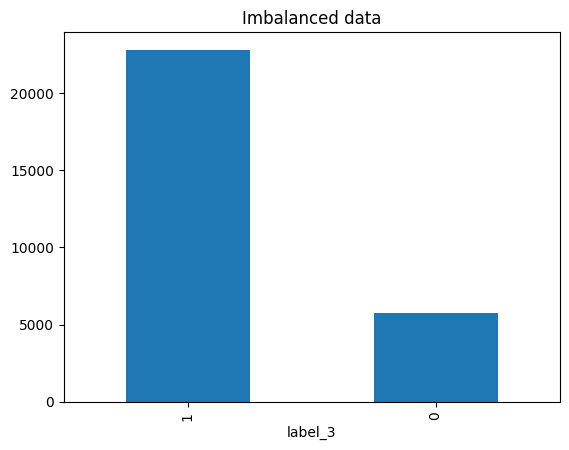

In [10]:
train3_df['label_3'].value_counts().plot(kind='bar',title='Imbalanced data')

In [11]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [12]:
# resampling the data
from imblearn.combine import SMOTETomek

resampler = SMOTETomek(random_state=0)
X3_train, Y3_train = resampler.fit_resample(X3_train, Y3_train)

In [22]:
# Initialize and train a Support Vector Machine classifier
svm_classifier = SVC()
svm_classifier.fit(X3_train, Y3_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X3_valid)

print(classification_report(Y3_valid, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.81      1.00      0.90       608

    accuracy                           0.81       750
   macro avg       0.41      0.50      0.45       750
weighted avg       0.66      0.81      0.73       750



/home/poorna/miniconda3/envs/lab/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/poorna/miniconda3/envs/lab/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/poorna/miniconda3/envs/lab/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [23]:
# Create a SelectKBest instance with a scoring function (e.g., chi-squared)
selector = SelectKBest(score_func=f_classif, k=250)  # Select the top 2 features

# Fit and transform your data to select the best k features
X3_best_train = selector.fit_transform(X3_train, Y3_train)
X3_best_valid = selector.transform(X3_valid)
X3_best_test = selector.transform(X3_test)

In [24]:
svm_classifier.fit(X3_best_train, Y3_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X3_best_valid)

print(classification_report(Y3_valid, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.81      1.00      0.90       608

    accuracy                           0.81       750
   macro avg       0.41      0.50      0.45       750
weighted avg       0.66      0.81      0.73       750



/home/poorna/miniconda3/envs/lab/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/poorna/miniconda3/envs/lab/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/poorna/miniconda3/envs/lab/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [25]:
pca=PCA(0.9)
pca = pca.fit(X3_best_train)

x3_train_pca=pca.fit_transform(X3_best_train)
x3_valid_pca = pca.transform(X3_best_valid)
x3_test_pca = pca.transform(X3_best_test)

In [26]:
svm_classifier.fit(x3_train_pca, Y3_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(x3_valid_pca)

print(classification_report(Y3_valid, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.81      1.00      0.90       608

    accuracy                           0.81       750
   macro avg       0.41      0.50      0.45       750
weighted avg       0.66      0.81      0.73       750



/home/poorna/miniconda3/envs/lab/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/poorna/miniconda3/envs/lab/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/poorna/miniconda3/envs/lab/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [27]:
x3_train_pca.shape

(45592, 60)

In [28]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the data to find the best hyperparameters
grid_search.fit(x3_train_pca, Y3_train)

# Print the best hyperparameters and corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Hyperparameters: {'C': 10, 'kernel': 'rbf'}
Best Accuracy: 0.9920381966203922


In [29]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x3_valid_pca)
test_preds = best_model.predict(x3_test_pca)

print(classification_report(Y3_valid, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.81      1.00      0.90       608

    accuracy                           0.81       750
   macro avg       0.41      0.50      0.45       750
weighted avg       0.66      0.81      0.73       750



/home/poorna/miniconda3/envs/lab/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/poorna/miniconda3/envs/lab/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/poorna/miniconda3/envs/lab/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [30]:
data_frame = pd.DataFrame(test_preds, columns=["label_3"])
data_frame.to_csv(f"190110V_3.csv",na_rep='')